<a href="https://colab.research.google.com/github/Jeongyeon-Myeong/shopping-mall-item-classification/blob/main/text_classification_using_shoppingmall_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
os.mkdir("/content/text_classification")
os.chdir('/content/text_classification')

In [ ]:
data_bags = pd.read_excel('text_list_bags.xlsx')
data_onepiece = pd.read_excel('text_list_onepiece.xlsx')
data_pants = pd.read_excel('text_list_pants.xlsx')
data_shoes = pd.read_excel('text_list_shoes.xlsx')
data_tshirt = pd.read_excel('text_list_tshirt.xlsx')

In [ ]:
import re
def regEx(dataset):
  text = []
  for i in range(len(dataset)) : 
    try :
      dataset["text"][i] = re.sub('[0-9-=+,#/\?:^$_.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', dataset["text"][i]) #i + 192
      print(dataset["text"][i])
    except Exception as e :
      continue
  return dataset

In [ ]:
#data_onepiece = regEx(data_onepiece)
#data_bags = regEx(data_bags)
#data_pants = regEx(data_pants)
#data_shoes = regEx(data_shoes)
data_tshirt = regEx(data_tshirt)

 심플 와이드 넥 티T나인NAIN                                           
 BNX 라운드넥 베이직 밑단티셔츠 BSTSL비엔엑스                           
 레이온골지티셔츠 JPTT매그제이MAGJAY                                 
 하프클럽나크캐롤라인 나염 티셔츠 DMT빅사이즈                       
 레오파드옆트임티셔츠PNJRTPB파파야                                        
 라운드넥 프린트 심플 티셔츠TKTSF탑걸                                    
 레터링 베이직 박시 티셔츠TKTSF탑걸                                      
 라운드 프린팅 포인트 티셔츠TKTSF탑걸                                    
 트로피칼반팔티셔츠AZTGK에이비에프지                                        
 도너츠 프린팅 포인트 티셔츠 BKTSA르샵                                   
 BNX 라운드넥 레터링 박스반팔티셔츠 BSTSL비엔엑스                       
 남성 순면 오버핏 반팔 티셔츠 EPATR엠폴햄                                 
 꽃무늬티셔츠 HCMTSM샤트렌                                                 
 비지트인뉴욕 라운드 데일리 레이온 무지 반팔티셔츠 VALTD비지트인뉴        
 어나더 레터링 프린팅 티셔츠 GKHTSF지지피엑스                             
 스트라이프 베이직 티셔츠VMTSW코벳블랑                                 
 피에이티 쉬폰 배색 블라우스형 티셔츠QF피에이티                           
 하프클럽탑온탑

In [ ]:
import pandas as pd
data = pd.concat([data_bags, data_onepiece])
data = pd.concat([data, data_pants])
data = pd.concat([data, data_shoes])
data = pd.concat([data, data_tshirt])

In [ ]:
data

,text,category
0,러브참 바니 에코백코튼 블루 ...,bags
1,소가죽 숄더 크로스백 PT ...,bags
2,라코스테라코스테 XS 쇼핑 크로스백 블랙 NFPO ...,bags
3,케즈에코백 와이드 토트백 SB외종택 ...,bags
4,스티치 양포켓 데일리 에코백 천가방 숄더백 홀리지 ...,bags
...,...,...
495,지오다노 남 코튼린넨 반팔 폴로 스웨터 지오다노 ...,tshirt
496,시흥점올젠코튼 카라 반팔 티셔츠 옐로우 ZOATTYE ...,tshirt
497,헤지스남성SSHZTSB N남성 캐주얼 네이비 헨리넥 면 반팔 라운드 티셔,tshirt
498,올젠AK분당점올젠서커조직 스트라이프 티셔츠 ZOATT NV ...,tshirt


In [ ]:
df = data.filter(['text','category'])

In [ ]:
df['category'] = df['category'].replace(['bags', 'onepiece', 'pants', 'shoes', 'tshirt'],[0,1,2,3,4]) 
# bags : 0, onepiece : 1, pants : 2, shoes : 3, tshirt : 4

In [ ]:
"""
from sklearn.model_selection import train_test_split
traindata, testdata = train_test_split(data,test_size=0.2, random_state=17)
"""

'\nfrom sklearn.model_selection import train_test_split\ntraindata, testdata = train_test_split(data,test_size=0.2, random_state=17)\n'

In [ ]:
#data
x_data = df['text']
y_data = df['category']

In [ ]:
y_data

0      0
1      0
2      0
3      0
4      0
      ..
495    4
496    4
497    4
498    4
499    4
Name: category, Length: 2500, dtype: int64

In [ ]:
# https://wikidocs.net/22894 참고
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_data)
sequences = tokenizer.texts_to_sequences(x_data)

In [ ]:
word_to_index = tokenizer.word_index # 단어에 대해 인덱스를 부여한다.
print(word_to_index) # 부여된 정수는 각 단어의 빈도수가 높을수록 낮은 정수가 부여된다.

{'원피스': 1, '여성': 2, '티셔츠': 3, '남성': 4, '반팔': 5, '여름': 6, '갤러리아': 7, '종': 8, '대구백화점': 9, '밴딩': 10, '크로스백': 11, '린넨': 12, '팬츠': 13, '남자': 14, '슬랙스': 15, '빅사이즈': 16, '스니커즈': 17, '부': 18, '에코백': 19, 'ss': 20, 'i관': 21, '숄더백': 22, '스판': 23, '바지': 24, '미니': 25, '블랙': 26, '운동화': 27, '와이드': 28, '데일리': 29, '롱': 30, '가방': 31, '슬립온': 32, '토트백': 33, '택': 34, '면': 35, '신발': 36, '프린트': 37, '여자': 38, '나이키': 39, '스트라이프': 40, '라운드': 41, '런닝화': 42, '단화': 43, '캔버스': 44, '지오다노': 45, '신상': 46, '캐주얼': 47, '레터링': 48, '체크': 49, '쿨': 50, '로퍼': 51, '반팔티셔츠': 52, '코튼': 53, 'ii관': 54, '레이스': 55, '면바지': 56, '반팔티': 57, '캉골': 58, '포켓': 59, 'cm': 60, '베이직': 61, '남녀공용': 62, '워킹화': 63, '컬러': 64, '카라': 65, '반바지': 66, '소가죽': 67, 'color': 68, '플라워': 69, '배색': 70, '모코블링': 71, '브이넥': 72, '썸머': 73, '키높이': 74, '니트': 75, 'pt': 76, '백': 77, '플리츠': 78, '밴딩팬츠': 79, '조깅화': 80, '스몰': 81, '포인트': 82, '시원한': 83, 'v넥': 84, '핀턱': 85, '라운드넥': 86, '일자': 87, '폴로': 88, '에잇세컨즈': 89, '에코': 90, '슬리퍼': 91, '무지': 92, '펀칭': 93, '플레어': 94, '부츠컷': 9

In [ ]:
vocab_size = len(word_to_index) + 1
print(vocab_size)

5473


In [ ]:
n_of_train = int(len(sequences) * 0.8) #2000
n_of_test = int(len(sequences) - n_of_train) #500

In [ ]:
n_of_train

2000

In [ ]:
# sequences
# len(sequences)
for i in range(len(sequences)) :
  list_seq = sequences[i]
  a = []
  for x in range(len(list_seq)):
    if(list_seq[x] < 1001):
      a.append(list_seq[x])
    sequences[i] = a

In [ ]:
sequences

[[504],
 [67, 107, 11, 76],
 [728, 11, 26, 729],
 [28, 33],
 [235, 29, 19, 236, 22],
 [730, 67, 122],
 [115, 731, 732, 733],
 [734, 26, 394, 25, 131, 22],
 [98, 22],
 [89, 735, 26, 505, 327, 25, 11],
 [279, 22],
 [280, 29],
 [736, 2, 22, 395, 506],
 [],
 [58, 90, 396, 507, 8, 34, 737],
 [115, 397, 237, 31, 8, 186, 508, 171],
 [738, 739, 281],
 [2, 29, 25, 11, 282],
 [238, 740, 67, 22],
 [107, 172, 11, 239],
 [],
 [155, 741, 742, 328],
 [123],
 [],
 [743, 2, 398, 26, 22],
 [],
 [283, 123],
 [],
 [115, 731, 732, 733],
 [58, 90, 744, 77, 284, 81, 8, 34],
 [745, 211, 20, 285, 746, 26, 286],
 [509, 747, 748],
 [22],
 [283, 749, 22],
 [20, 287, 212],
 [98, 172, 22],
 [509, 329, 747, 748, 750],
 [283, 749, 22],
 [751],
 [],
 [330, 239, 140, 172, 22],
 [330, 239, 98, 172, 22, 752],
 [751],
 [19, 2, 31, 213, 141],
 [330, 239],
 [753, 399, 187, 214, 22],
 [754, 400, 8, 34],
 [510, 107, 328, 11, 116, 755, 99],
 [26, 33, 22],
 [279, 140],
 [2],
 [115, 81],
 [67, 22],
 [279, 22, 132],
 [756, 757],


In [ ]:
x_data = sequences
print(max(len(l) for l in x_data)) # 최대길이 15

14


In [ ]:
max_len = 14 #  부족한 경우에는 부족한 부분이 0으로 패딩된다
data_sequence= pad_sequences(x_data, maxlen=max_len) #길이를 통일 시켜준다

In [ ]:
y_data = to_categorical(y_data) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

In [ ]:
x_test = data_sequence[n_of_train:] # 뒤의 데이터
y_test = np.array(y_data[n_of_train:]) # 뒤의 데이터
x_train = data_sequence[:n_of_train] # 앞의 데이터
y_train = np.array(y_data[:n_of_train]) # 앞의 데이터

In [ ]:
print(x_train[0])
print(y_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0 504]
[1. 0. 0. 0. 0.]


In [ ]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
model = Sequential()
model.add(Embedding(1001,120)) #32 개의 차원을 갖는 임베딩 벡터 vocab_size만큼 생성
model.add(LSTM(120))
model.add(Dense(5, activation='softmax')) # 5개의 카테고리를 분류하므로, 각 입력에 대해서 2개의 확률분포를 만들어 낸다. activation='sigmoid' activation='softmax'

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=4) # 검증 데이터 손실 val_loss가 증가하면 과적합의 징후이므로 4회 증가시 학습데이터 조기 종료
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max',verbose=1, save_best_only=True) # ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 때 모델 저장

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 
# 다중 클래스 분류 문제 categorical_crossentropy 이용
#모델의 예측값과 실제값에 대해서 두 확률 분포 사이 거리를 최소화하도록 훈련

In [ ]:
history = model.fit(x_train, y_train,batch_size=10, epochs=30, callbacks=[es, mc], validation_data=(x_test, y_test))

Epoch 1/30
200/200 [==============================] - ETA: 0s - loss: 0.9680 - acc: 0.5910
Epoch 00001: val_acc improved from -inf to 0.00000, saving model to best_model.h5
200/200 [==============================] - 3s 16ms/step - loss: 0.9680 - acc: 0.5910 - val_loss: 7.6608 - val_acc: 0.0000e+00
Epoch 2/30
198/200 [============================>.] - ETA: 0s - loss: 0.3561 - acc: 0.8596
Epoch 00002: val_acc did not improve from 0.00000
200/200 [==============================] - 3s 14ms/step - loss: 0.3564 - acc: 0.8595 - val_loss: 7.0835 - val_acc: 0.0000e+00
Epoch 3/30
198/200 [============================>.] - ETA: 0s - loss: 0.2606 - acc: 0.8894
Epoch 00003: val_acc did not improve from 0.00000
200/200 [==============================] - 3s 14ms/step - loss: 0.2603 - acc: 0.8895 - val_loss: 7.6406 - val_acc: 0.0000e+00
Epoch 4/30
198/200 [============================>.] - ETA: 0s - loss: 0.2289 - acc: 0.8949
Epoch 00004: val_acc did not improve from 0.00000
200/200 [=================

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

16/16 [==============================] - 0s 6ms/step - loss: 7.6608 - acc: 0.0000e+00

 테스트 정확도: 0.0000


In [ ]:
x_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 118,  28,
       445], dtype=int32)

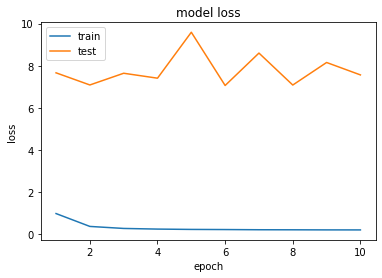

In [ ]:

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()